# K-Means Clustering Algorithm
**Author**: James Chen, School of Animal Sciences, Virginia Tech

**Date**: Aug 3, 2022

<center><img src="res/l03/cover.png" width="900"/></center>

## **Set up the environment**
### Clone the repository (demo data and scripts)

In [ ]:
# use a exclamation mark, "!", to call Shell command in Python
!git clone https://github.com/vt-ads/intro_to_phenomics

### Change the working directory

In [ ]:
import os
# change WD
os.chdir("/content/intro_to_phenomics")
# print WD
print("Current folder: ", os.getcwd())

### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## **Data**

### Multivariate normal distribution
First, we can simulate a structured data that is sampled from two different multivariate normal distributions.


In [194]:
# number of clusters
k = 2
# number of data points in each cluster
n = 50
# total number of data points
N = n * k
# cluster proerties: means and standard deviation
means = [[40, 40], [60, 70]]
stds = [[[80, 0],
         [0, 70]],
        [[60, 10],
         [10, 90]]]

# use np.random.multivariate_normal() to sample the datasets
data = []
for mean, std in zip(means, stds):
    data += [np.random.multivariate_normal(mean=mean, cov=std, size=n)]
data = np.concatenate(data)

# validattion
print("Shape: ", data.shape)
print(data[:20])

Shape:  (100, 2)
[[51.66251802 47.84412914]
 [39.71618565 50.12966424]
 [35.30204586 30.11518838]
 [41.21290983 37.45870684]
 [33.50222942 27.44831926]
 [45.59088463 45.32844912]
 [42.53108047 46.10790442]
 [28.29073007 52.30456678]
 [38.31237176 34.84785694]
 [29.25183562 43.67950456]
 [40.58293457 25.99292839]
 [45.3154831  45.79598333]
 [22.58292304 39.54979532]
 [33.92459233 43.18324273]
 [38.06019806 40.15521412]
 [38.81693873 47.34977002]
 [43.93189465 42.68070032]
 [46.3391774  51.42474463]
 [42.13973106 38.61929858]
 [45.20335028 38.9488359 ]]


### Visualization
It is always good to visually inspect your datasets. Here, we use the library `matplotlib` to visualize the data and to confirm the simulated structure.

In [ ]:
# plotting parameters
param_pts = dict(s=80, alpha=.3)
# plotting
plt.figure(figsize=(8, 8))
# data points
plt.scatter(data[:n, 0], data[:n, 1],
            c="red", label="cluster_1", **param_pts)
plt.scatter(data[n:, 0], data[n:, 1],
            c="blue", label="cluster_2", **param_pts)
plt.title("Ground Truth")
# add plot legend
plt.legend()

## **Assumptions**
Before we cluster the given data, we may integrate our prior knowledge or assumption to the clustering algorithms for better performance in both precision and time.

### Centroids
Centroids are the centeral coordinates, or average values, of each cluster. We have to provide initial centroids to start the clustering iterations. This step is essential to the model performance as improper initial states may lead to longer converence time or non-convergent results.

In our example, however, we can randomly generate the initial centroids. As the data size is relatively small, and the data structure is clearly defined.

In [ ]:
centroids = data[np.random.choice(N, k)]

# plotting parameters
param_pts = dict(s=80, alpha=.3)
param_cts = dict(s=250, edgecolor="black")
# plotting
plt.figure(figsize=(8, 8))
# data points
plt.scatter(data[:, 0], data[:, 1], c="black", **param_pts)
# centroids
plt.scatter(centroids[0, 0], centroids[0, 1],
            c="red", label="centroid_1", **param_cts)
plt.scatter(centroids[1, 0], centroids[1, 1],
            c="blue", label="centroid_2", **param_cts)
# add plot legend
plt.legend()

### Distance
The distance deviation between the centroids and each data point is another key component in clustering algorithm. This is a guidance (loss function) for the model to be trained and generate ideal outcomes. For example, if we want to cluster a genetic sequence based on their recombination rates, we have to take genetic distances into consideration when we define the loss function.

But again, in this note, we try to keep everything as simple as possible. The distance between data points will be evaluted by Euclidean distance.

In [ ]:
# define the evaluation function
def euclidean_distance(x, y):
    return np.sum((x - y) ** 2) ** .5

# validate the result
x = np.array([0, 0])
y = np.array([3, 4])
print("the distance is: ", euclidean_distance(x, y))

## **Clustering algorithm**
K-Means clustering algorithm consists of two major stages: `assignment` and `update`. Iteratively implementing these two stages is expected to cluster the given datasets based on the defined distance function and provided centroids.

### Assignment stage
In this stage, each point will be assigned to the cluster that has the shortest distance from its centroid.
<center><img src="res/l03/assignment.png" width="800"/></center>

In [ ]:
# collect the data parameters
N = len(data)
k = len(centroids)

# create an empty matrix to keep all evaluated distances
distances = np.zeros((N, k))

# iterate through each data point
for i, x in enumerate(data):
    # iterate through each cluster
    for j, center in enumerate(centroids):
        distances[i, j] = euclidean_distance(x, center)

# this will return the position of the smallest values
labels = np.argmin(distances, axis=1)

# validation
print("Assigned cluster: \n", labels)

### Update stage
<center><img src="res/l03/update.png" width="800"/></center>

In [220]:
# create an empty matrix to keep the new centroids
new_centroids = np.zeros((k, 2))

# iterate over each cluster
for i in range(k):
    new_centroids[i] = data[labels == i].mean(axis=0)

# validation
print("New center: \n", new_centroids)

New center: 
 [[46.03119778 49.50940525]
 [65.17052381 76.45371394]]


### Another assignment stage

In [221]:
distances = np.zeros((N, k))
for i, x in enumerate(data):
    for j, center in enumerate(new_centroids):
        distances[i, j] = euclidean_distance(x, center)
new_labels = np.argmin(distances, axis=1)

### Visualize the outcome

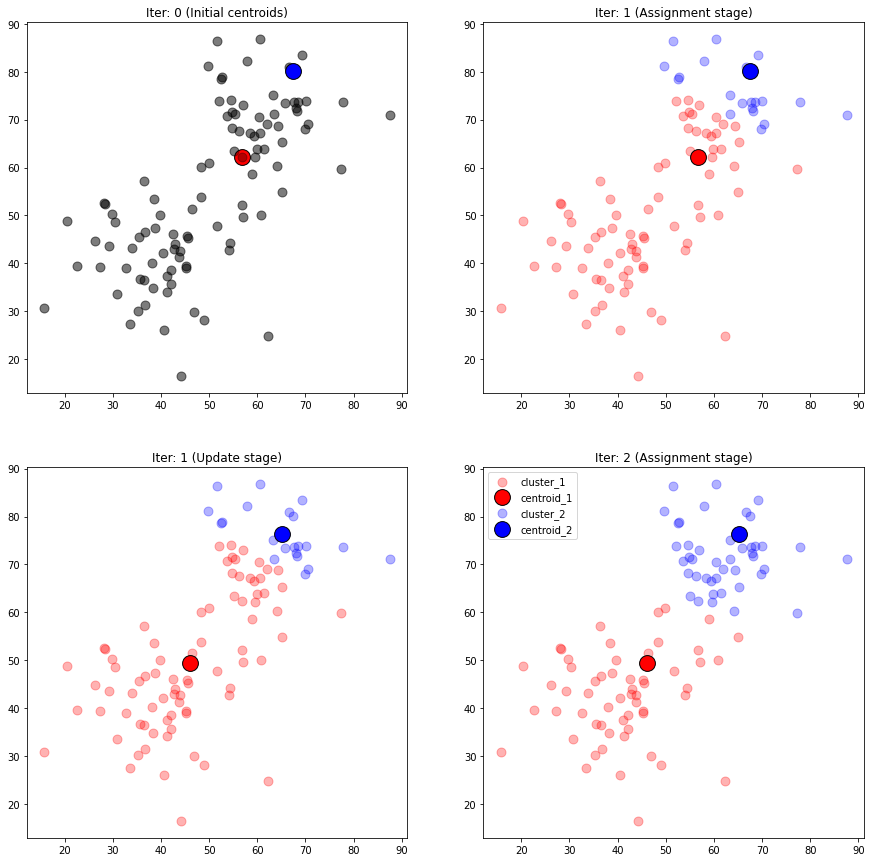

In [233]:
# inner loop
param_pts = [dict(c="red",  label="cluster_1", s=80, alpha=.3),
             dict(c="blue", label="cluster_2", s=80, alpha=.3)]
param_cts = [dict(c="red",  label="centroid_1", s=250, edgecolor="black"),
             dict(c="blue", label="centroid_2", s=250, edgecolor="black")]

# outer loop
titles = ["Iter: 0 (Initial centroids)",
          "Iter: 1 (Assignment stage)",
          "Iter: 1 (Update stage)",
          "Iter: 2 (Assignment stage)"]
ls_data = [[data[:n],            data[n:]],
           [data[labels==0],     data[labels==1]],
           [data[labels==0],     data[labels==1]],
           [data[new_labels==0], data[new_labels==1]]]
ls_cts  = [centroids,
           centroids,
           new_centroids,
           new_centroids]

# create a new figure
fig = plt.figure(figsize=(15, 15))
# iterate over subplots
for (i, title, pts, cts) in zip(range(4), titles, ls_data, ls_cts):
    axis = fig.add_subplot(2, 2, i + 1)
    axis.set_title(title)
    # iterate over clusters
    for (pt, ct, param_pt, param_ct) in zip(pts, cts, param_pts, param_cts):
        if i != 0:
            axis.scatter(x=pt[:, 0], y=pt[:, 1], **param_pt)
        else:
            axis.scatter(x=data[:, 0], y=data[:, 1], label="unlabeled data", c="black", s=80, alpha=.3)
        axis.scatter(x=ct[0], y=ct[1], **param_ct)
axis.legend(loc='upper left')

### Put things together
We can collect all code blocks and put them into one signle function `kmeans(X, k)`, where `X` is a 2D matrix in a shape of `(n, p)`, and `k` is the number of clusters.

<center><img src="res/l03/kmeans.png" width="600"/></center>

In [133]:
def kmeans(X, k, niter=20):
    pass
    return dict(labels=labels, centers=centers)

In [235]:
kmean = kmeans(X=data, k=2, niter=3)
kmean

{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'centers': array([[39.43982725, 41.26782558],
        [61.54530433, 70.22591828]])}

In [1]:
titles  = ["Ground truth", "K-Means (iter: 10)"]
ls_data = [[data[:n],                 data[n:]],
           [data[kmean["labels"]==0], data[kmean["labels"]==1]]]
ls_cts  = [centroids, kmean["centers"]]

# create a new figure
fig = plt.figure(figsize=(16, 8))
# iterate over subplots
for (i, title, pts, cts) in zip(range(2), titles, ls_data, ls_cts):
    axis = fig.add_subplot(1, 2, i + 1)
    axis.set_title(title)
    # iterate over clusters
    for (pt, ct, param_pt, param_ct) in zip(pts, cts, param_pts, param_cts):
        axis.scatter(x=pt[:, 0], y=pt[:, 1], **param_pt)
        if i != 0:
            axis.scatter(x=ct[0], y=ct[1],   **param_ct)


ErrorException: syntax: missing last argument in "n:" range expression 

## *Work with real data*
### Load the image

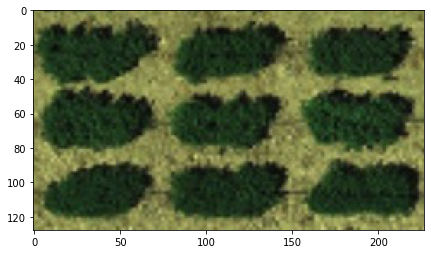

In [5]:
from modules.image_handler import load_img
img = load_img("data/plots.jpg")
plt.figure(figsize=(7, 7))
plt.imshow(img)

### Dataframe

In [6]:
import pandas as pd
df = pd.DataFrame(img.reshape((-1, 3)))
df.columns = ["red", "green", "blue"]
print(df)

       red  green  blue
0      134    135    75
1      150    152    89
2      157    162    96
3      169    174   107
4      156    163    96
...    ...    ...   ...
29051  181    185   111
29052  162    166    92
29053  121    120    56
29054  132    131    67
29055  173    173   109

[29056 rows x 3 columns]


In [7]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
dfs = df.iloc[::100, ] # sample 1 data point every 100 pixels
points = go.Scatter3d(x=dfs.red, y=dfs.green, z=dfs.blue,
                    mode='markers', name='pixel value',
                    marker=dict(size=5, symbol='circle', opacity=0.7))
layout = go.Layout(scene=dict(xaxis=dict(title="red"),
                              yaxis=dict(title="green"),
                              zaxis=dict(title="blue")),
                   margin=dict(l=100, r=200, b=0, t=0))
fig = go.Figure(data=[points], layout=layout)
fig.show()

In [8]:
from modules.kmeans import KMeans_sklearn
h, w, c = img.shape
data = img.reshape((-1, c))
kmean = KMeans_sklearn(X=data, k=3)

Text(0.5, 1.0, 'Clustered image')

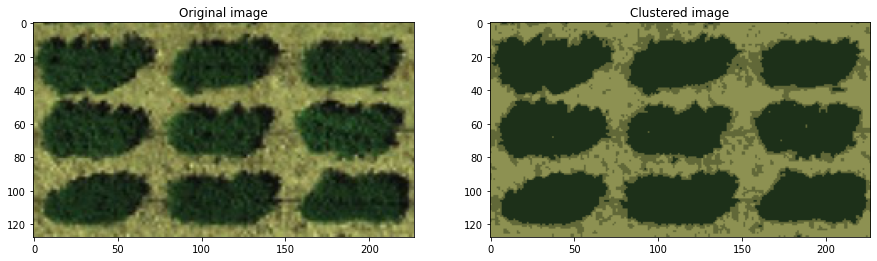

In [9]:
labels = kmean["labels"]
centers = kmean["centers"].astype(int)
img_new = centers[labels].reshape((h, w, c))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title("Original image")
axes[1].imshow(img_new)
axes[1].set_title("Clustered image")

In [10]:
colors     = ["rgb(%d, %d, %d)" % tuple(color.tolist()) for color in centers]
dfs        = df.iloc[::100]
labels_sub = labels[::100]
ls_points  = []
for i in range(3):
    ls_points += [go.Scatter3d(x=dfs.loc[labels_sub==i, "red"],
                               y=dfs.loc[labels_sub==i, "green"],
                               z=dfs.loc[labels_sub==i, "blue"],
                               mode='markers', name='cluster_%d' % (i + 1),
                               marker=dict(size=5, symbol='circle', opacity=0.7))]
# layout
layout = go.Layout(scene=dict(xaxis=dict(title="red"),
                              yaxis=dict(title="green"),
                              zaxis=dict(title="blue")),
                   margin=dict(l=100, r=200, b=0, t=0))
# show
fig = go.Figure(data=ls_points, layout=layout)
fig.show()